In [79]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed/'
os.chdir(directory)

In [80]:
lindf = pd.DataFrame
contentlist = []
for path in glob.glob("LineageData/lineagedata_*.csv"):
    df = pd.read_csv(path,header=0)
    contentlist.append(df)
    lindf = pd.concat(contentlist)

In [52]:
lindf = lindf.drop(lindf.columns[0], axis=1)

In [185]:
lindf.Lineage_Elongation_Rate.std(ddof=1)/lindf.Lineage_Elongation_Rate.mean()

0.11307755274701414

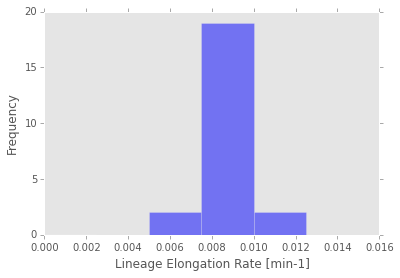

In [174]:
ax= lindf.Lineage_Elongation_Rate.hist(color = 'blue', alpha= 0.5,bins=[0, 0.0025,0.005,0.0075,0.01,0.0125,0.015])
ax.set_xlabel('Lineage Elongation Rate [min-1]')
ax.set_ylabel('Frequency')
ax.grid(False)
plt.savefig(directory+'/Graphs/Total_Analysis/LineageERHistogram.pdf')

0.207982302868


/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


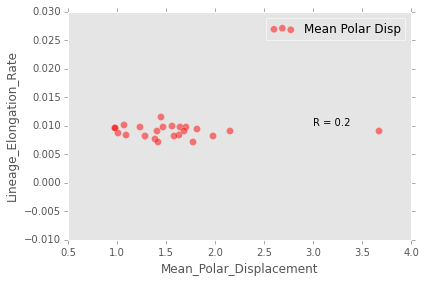

In [190]:
ax = lindf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Lineage_Elongation_Rate',alpha=0.5,label = 'Mean Polar Disp', color = 'red', s =50)
corr = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
print(corr)
ax.annotate('R = %.1f'%corr, (3,0.01))
ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


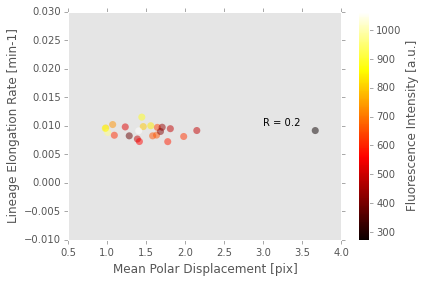

In [181]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1)
ax.scatter(lindf.Mean_Polar_Displacement, lindf.Lineage_Elongation_Rate,alpha=0.5,c = lindf.Fluorescence_Intensity, cmap =cm.hot,s=50, edgecolor ='None')

corr = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
sm = plt.cm.ScalarMappable(cmap=cm.hot)
sm.set_array(lindf.Fluorescence_Intensity)
plt.colorbar(sm, label = 'Fluorescence Intensity [a.u.]')

ax.annotate('R = %.1f'%corr, (3,0.01))
ax.set_ylabel('Lineage Elongation Rate [min-1]')
ax.set_xlabel("Mean Polar Displacement [pix]")
ax.grid(False)
plt.tight_layout()
#plt.show()

fig1 = plt.gcf()
fig1.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-MeanPolar-Scatter-Fluor.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


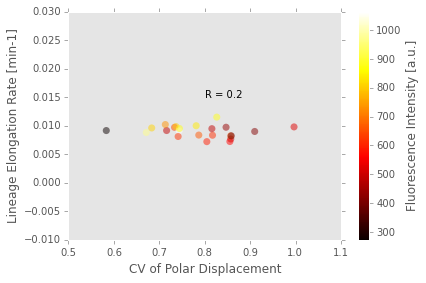

In [167]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1)
ax.scatter(lindf.CV_Polar_Displacement, lindf.Lineage_Elongation_Rate,alpha=0.5,c = lindf.Fluorescence_Intensity, cmap =cm.hot,s=50, edgecolor ='None')

corr = ((1-(lindf.Lineage_Elongation_Rate.corr(lindf.CV_Polar_Displacement))**2)/len(lindf))**(0.5)
sm = plt.cm.ScalarMappable(cmap=cm.hot)
sm.set_array(lindf.Fluorescence_Intensity)
plt.colorbar(sm, label = 'Fluorescence Intensity [a.u.]')

ax.annotate('R = %.1f'%corr, (0.8,0.015))
ax.set_ylabel('Lineage Elongation Rate [min-1]')
ax.set_xlabel("CV of Polar Displacement")
ax.grid(False)
plt.tight_layout()
#plt.show()

fig1 = plt.gcf()
fig1.savefig(directory+'/Graphs/Total_Analysis/Lineage-ER-CVPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


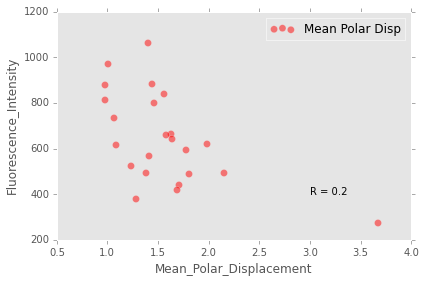

In [193]:
ax = lindf.plot(kind='scatter', x = 'Mean_Polar_Displacement', y = 'Fluorescence_Intensity',alpha=0.5,label = 'Mean Polar Disp', color = 'red',s =50)
corr = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Mean_Polar_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr, (3,400))
ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'/Graphs/Total_Analysis/Lineage-Fluor-MeanPolar-Scatter.pdf')

/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


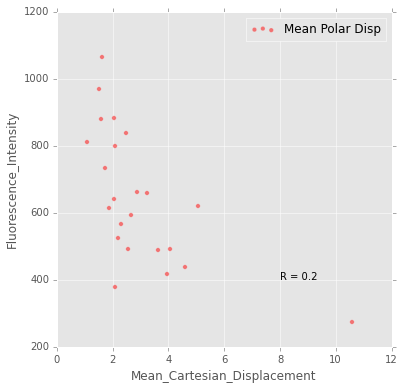

In [59]:
ax = lindf.plot(kind='scatter', x = 'Mean_Cartesian_Displacement', y = 'Fluorescence_Intensity',alpha=0.5,label = 'Mean Polar Disp', color = 'red', figsize=(6,6))
corr = ((1-(lindf.Fluorescence_Intensity.corr(lindf.Mean_Cartesian_Displacement))**2)/len(lindf))**(0.5)
ax.annotate('R = %.1f'%corr, (8,400))